<a href="https://colab.research.google.com/github/rawatpremsingh999/Financial-Sentiment-Analysis/blob/master/Stocktwits_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import files

#uploaded = files.upload()

In [2]:
import pandas as pd
import numpy as np

In [59]:
from __future__ import division, print_function
from gensim import models
#from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
#from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score,accuracy_score

In [4]:
url = 'https://raw.githubusercontent.com/rawatpremsingh999/Financial-Sentiment-Analysis/master/Stocktwits__Cleaned.csv'
df = pd.read_csv(url)

In [5]:
df.head()

,cleaned_message,sentiment
0,tsla funny all these people be say it be go to...,Bullish
1,tsla anyone else feel we have be pin the last ...,Bullish
2,tsla anytime watchout,Bearish
3,tsla bear be scared let them bring it down so ...,Bullish
4,tsla dollarbanknote rocket rocket rocket rocke...,Bullish


In [6]:
df.shape

(5655, 2)

In [7]:
X = np.array(df['cleaned_message'].tolist()).reshape(-1,1)

In [8]:
y = np.array(df['sentiment'].tolist())

In [9]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=777)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [10]:
X,y = ros.fit_resample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [11]:
type(X)
type(y)

numpy.ndarray

In [31]:
from collections import Counter
Counter(y)

Counter({'Bearish': 4264, 'Bullish': 4264})

In [32]:
numpy_data = np.concatenate((X,y.reshape(-1,1)),axis=1)

In [33]:
df = pd.DataFrame(data=numpy_data, columns=["cleaned_message", "sentiment"])

In [34]:
df.sentiment.unique()

array(['Bullish', 'Bearish'], dtype=object)

In [35]:
duplicate = df[df.duplicated()] 

duplicate.shape

(2890, 2)

In [ ]:
#df.drop_duplicates(inplace=True)

#df.shape

In [36]:
bull = []
bear = []
for l in df.sentiment:
    if l == 'Bearish':
        bull.append(0)
        bear.append(1)
    elif l == 'Bullish':
        bull.append(1)
        bear.append(0)

In [37]:
df['Bullish']= bull
df['Bearish']= bear

In [38]:
df.shape

(8528, 4)

In [20]:
#import nltk
#nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
#nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
from nltk import word_tokenize, WordNetLemmatizer
tokens = [word_tokenize(sen) for sen in df.cleaned_message]

In [40]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

In [41]:
def remove_stop_words(tokens): 
    return [word for word in tokens if word not in stoplist]

In [42]:
filtered_words = [remove_stop_words(sen) for sen in tokens]

In [43]:
result = [' '.join(sen) for sen in filtered_words]

In [44]:
df['Text_Final'] = result

In [45]:
df['tokens'] = filtered_words

In [46]:
df.head()

,cleaned_message,sentiment,Bullish,Bearish,Text_Final,tokens
0,tsla funny all these people be say it be go to...,Bullish,1,0,tsla funny people say go crash pullback bounce...,"[tsla, funny, people, say, go, crash, pullback..."
1,tsla anyone else feel we have be pin the last ...,Bullish,1,0,tsla anyone else feel pin last week,"[tsla, anyone, else, feel, pin, last, week]"
2,tsla anytime watchout,Bearish,0,1,tsla anytime watchout,"[tsla, anytime, watchout]"
3,tsla bear be scared let them bring it down so ...,Bullish,1,0,tsla bear scared let bring little extra money lol,"[tsla, bear, scared, let, bring, little, extra..."
4,tsla dollarbanknote rocket rocket rocket rocke...,Bullish,1,0,tsla dollarbanknote rocket rocket rocket rocke...,"[tsla, dollarbanknote, rocket, rocket, rocket,..."


In [47]:
df = df[['Text_Final', 'tokens', 'sentiment', 'Bullish', 'Bearish']]

In [48]:
df.head()

,Text_Final,tokens,sentiment,Bullish,Bearish
0,tsla funny people say go crash pullback bounce...,"[tsla, funny, people, say, go, crash, pullback...",Bullish,1,0
1,tsla anyone else feel pin last week,"[tsla, anyone, else, feel, pin, last, week]",Bullish,1,0
2,tsla anytime watchout,"[tsla, anytime, watchout]",Bearish,0,1
3,tsla bear scared let bring little extra money lol,"[tsla, bear, scared, let, bring, little, extra...",Bullish,1,0
4,tsla dollarbanknote rocket rocket rocket rocke...,"[tsla, dollarbanknote, rocket, rocket, rocket,...",Bullish,1,0


### Split data into train and test

In [49]:
data_train, data_test = train_test_split(df, test_size=0.20, random_state=42)

In [50]:
data_train.shape,data_test.shape

((6822, 5), (1706, 5))

In [51]:
data_test.reset_index(inplace=True)

In [52]:
duplicate = data_test[data_test.duplicated(subset=['Text_Final','sentiment'])] 

duplicate.shape

(202, 6)

In [53]:
data_test.drop_duplicates(subset=['Text_Final','sentiment'],inplace=True)
data_test.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(1504, 6)

In [54]:
data_test.drop(columns=['index'],inplace=True)
data_test.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Text_Final,tokens,sentiment,Bullish,Bearish
0,snap gt twtr gt pin gt fb order ghost ghost ghost,"[snap, gt, twtr, gt, pin, gt, fb, order, ghost...",Bullish,1,0
1,tsla low volume pumping remind lot pre er thin...,"[tsla, low, volume, pumping, remind, lot, pre,...",Bearish,0,1
2,snap also collectively stop refer superimposit...,"[snap, also, collectively, stop, refer, superi...",Bearish,0,1
3,spy bearface market bears cut deeply thumbsdow...,"[spy, bearface, market, bears, cut, deeply, th...",Bearish,0,1
4,twtr bearish,"[twtr, bearish]",Bearish,0,1


In [55]:
data_train.head()

,Text_Final,tokens,sentiment,Bullish,Bearish
6301,nkla nikola set record straight confirm everyt...,"[nkla, nikola, set, record, straight, confirm,...",Bearish,0,1
549,btcx interesting week ahead still plot decembe...,"[btcx, interesting, week, ahead, still, plot, ...",Bullish,1,0
2697,nflx get bastard,"[nflx, get, bastard]",Bullish,1,0
764,twtr long heaven next,"[twtr, long, heaven, next]",Bullish,1,0
8474,mu,[mu],Bearish,0,1


In [56]:
all_training_words = [word for tokens in data_train["tokens"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in data_train["tokens"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

82273 words total, with a vocabulary size of 7252
Max sentence length is 113


**Google News Word2Vec**

In [57]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2020-11-26 14:39:14--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.137.254
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.137.254|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  16.7MB/s    in 97s     

2020-11-26 14:40:52 (16.2 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [60]:
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz' # from above
word2vec = models.KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

In [61]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_comments, generate_missing=False):
    embeddings = clean_comments['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [62]:
training_embeddings = get_word2vec_embeddings(word2vec, data_train, generate_missing=True)

In [63]:
MAX_SEQUENCE_LENGTH = 70
EMBEDDING_DIM = 300

In [64]:
tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), lower=True, char_level=False)
tokenizer.fit_on_texts(data_train["Text_Final"].tolist())
training_sequences = tokenizer.texts_to_sequences(data_train["Text_Final"].tolist())

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))

Found 7252 unique tokens.


In [65]:
train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [66]:
train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)

(7253, 300)


In [67]:
test_sequences = tokenizer.texts_to_sequences(data_test["Text_Final"].tolist())
test_cnn_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [68]:
def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index):
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=False)
   
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=False)
    
    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)


    convs = []
    filter_sizes = [3,5,7]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=200, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = GlobalMaxPooling1D()(l_conv)
        convs.append(l_pool)


    l_merge = concatenate(convs, axis=1)

    x = Dropout(0.1)(l_merge)  
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    preds = Dense(labels_index, activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
    model.summary()
    
    return model

In [69]:
label_names = ['Bullish', 'Bearish']

In [70]:
y_train = data_train[label_names].values

In [71]:
x_train = train_cnn_data
y_tr = y_train

In [72]:
y_tr.shape

(6822, 2)

In [73]:
model = ConvNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, 
                len(list(label_names)))

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 70)]         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 70, 300)      2175900     input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 68, 200)      180200      embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 66, 200)      300200      embedding_1[0][0]                
_______________________________________________________________________________________

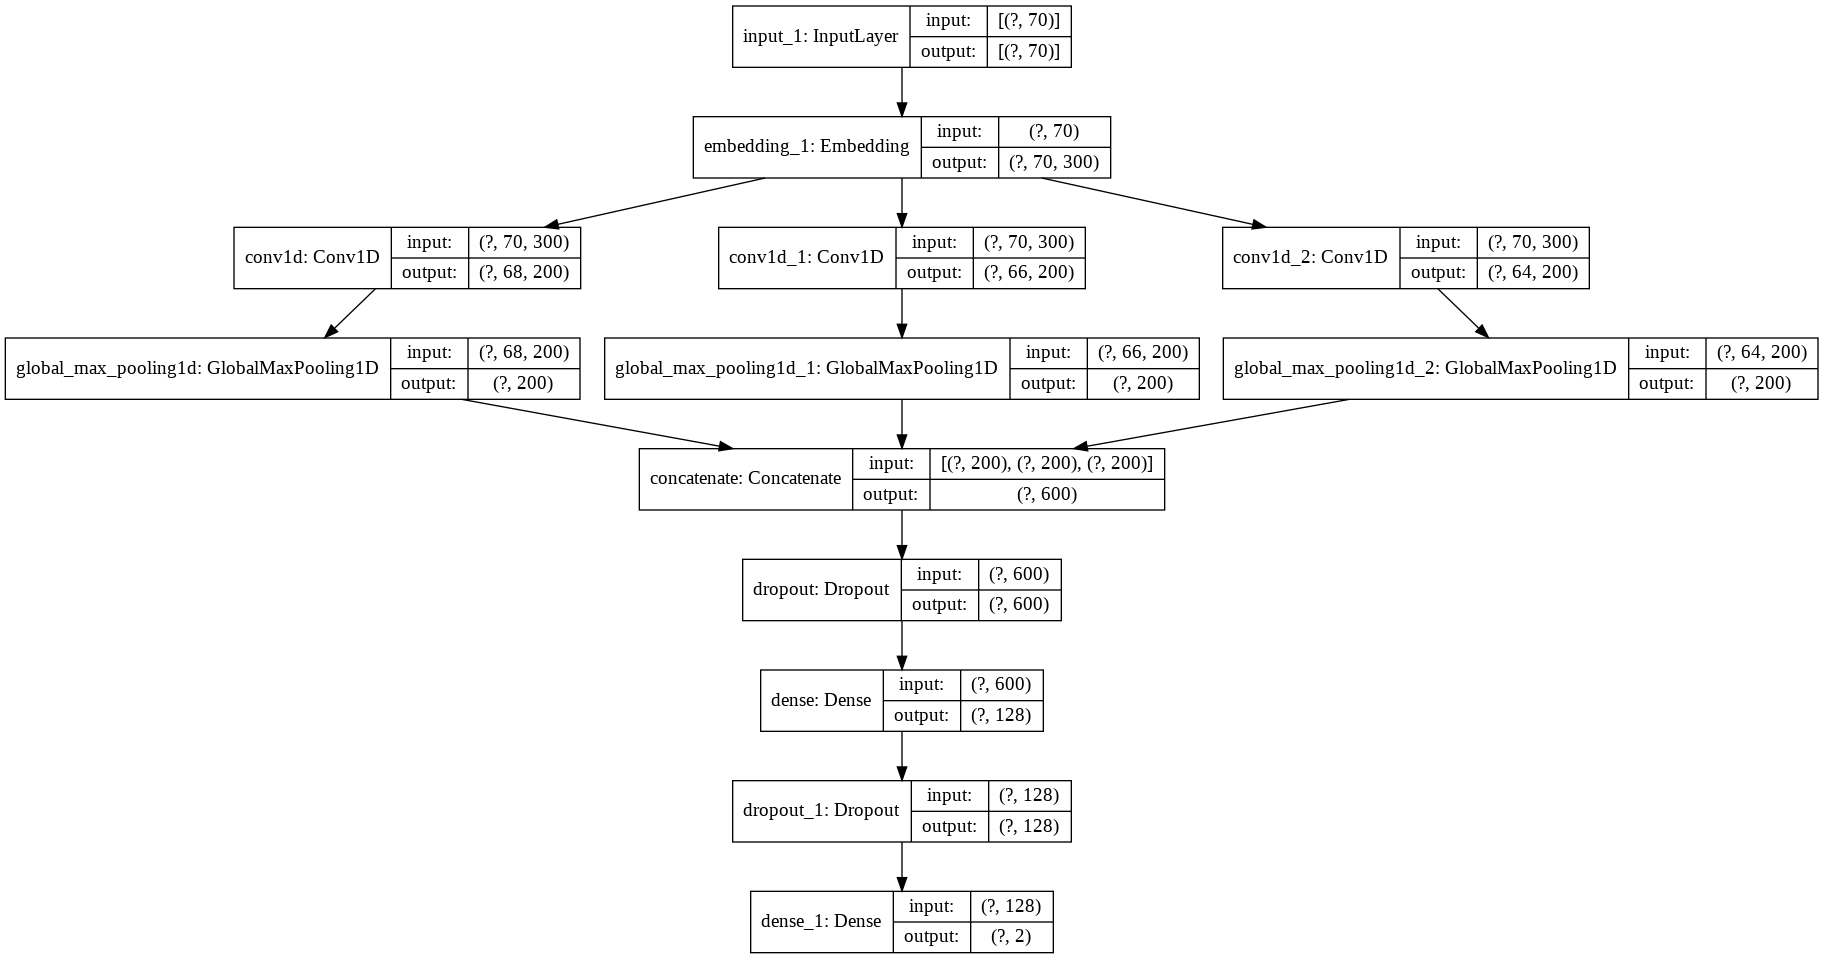

In [74]:
import tensorflow as tf
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [75]:
num_epochs = 25
batch_size = 100

In [76]:
hist = model.fit(x_train, y_tr, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)

Epoch 1/25
62/62 [==============================] - 29s 462ms/step - loss: 0.6992 - acc: 0.5788 - val_loss: 0.6102 - val_acc: 0.6852
Epoch 2/25
62/62 [==============================] - 28s 458ms/step - loss: 0.5665 - acc: 0.7043 - val_loss: 0.5080 - val_acc: 0.7613
Epoch 3/25
62/62 [==============================] - 28s 454ms/step - loss: 0.4247 - acc: 0.8062 - val_loss: 0.4437 - val_acc: 0.7760
Epoch 4/25
62/62 [==============================] - 29s 467ms/step - loss: 0.2696 - acc: 0.8920 - val_loss: 0.3224 - val_acc: 0.8433
Epoch 5/25
62/62 [==============================] - 28s 455ms/step - loss: 0.1786 - acc: 0.9317 - val_loss: 0.4061 - val_acc: 0.8258
Epoch 6/25
62/62 [==============================] - 28s 453ms/step - loss: 0.1353 - acc: 0.9440 - val_loss: 0.4699 - val_acc: 0.8199
Epoch 7/25
62/62 [==============================] - 28s 454ms/step - loss: 0.0924 - acc: 0.9635 - val_loss: 0.4267 - val_acc: 0.8389
Epoch 8/25
62/62 [==============================] - 28s 453ms/step - 

In [81]:
hist.model

In [82]:
predictions = model.predict(test_cnn_data, batch_size=1024, verbose=1)

2/2 [==============================] - 1s 440ms/step


In [83]:
labels = [1, 0]

In [84]:
predictions

array([[1.0000000e+00, 3.4050156e-09],
       [1.4410926e-06, 9.9999857e-01],
       [2.5034728e-03, 9.9749655e-01],
       ...,
       [9.9928528e-01, 7.1479130e-04],
       [1.4704926e-03, 9.9852943e-01],
       [1.0000000e+00, 4.9243332e-11]], dtype=float32)

In [85]:
prediction_labels=[]
for p in predictions:
    prediction_labels.append(labels[np.argmax(p)])
'''
prediction_prob=[]
for i in range(len(predictions)):
    prediction_prob.append(max(predictions[i]))
prediction_prob
'''

'\nprediction_prob=[]\nfor i in range(len(predictions)):\n    prediction_prob.append(max(predictions[i]))\nprediction_prob\n'

In [86]:
test_labels = []
for sen in data_test.sentiment:
  if sen == 'Bullish':
    test_labels.append(1)
  else:
    test_labels.append(0)

In [87]:
data_test['Label'] = test_labels

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [88]:
data_test.head()

,Text_Final,tokens,sentiment,Bullish,Bearish,Label
0,snap gt twtr gt pin gt fb order ghost ghost ghost,"[snap, gt, twtr, gt, pin, gt, fb, order, ghost...",Bullish,1,0,1
1,tsla low volume pumping remind lot pre er thin...,"[tsla, low, volume, pumping, remind, lot, pre,...",Bearish,0,1,0
2,snap also collectively stop refer superimposit...,"[snap, also, collectively, stop, refer, superi...",Bearish,0,1,0
3,spy bearface market bears cut deeply thumbsdow...,"[spy, bearface, market, bears, cut, deeply, th...",Bearish,0,1,0
4,twtr bearish,"[twtr, bearish]",Bearish,0,1,0


In [89]:
sum(data_test.Label==prediction_labels)/len(prediction_labels)

0.9049202127659575

In [90]:
print(classification_report(data_test.Label, prediction_labels))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       655
           1       0.93      0.90      0.91       849

    accuracy                           0.90      1504
   macro avg       0.90      0.91      0.90      1504
weighted avg       0.91      0.90      0.91      1504



In [91]:
print(accuracy_score(data_test.Label, prediction_labels))
print(precision_score(data_test.Label, prediction_labels))
print(recall_score(data_test.Label, prediction_labels))
print(f1_score(data_test.Label, prediction_labels))

0.9049202127659575
0.9294403892944039
0.8998822143698468
0.91442250149611


In [92]:
confusion_matrix(data_test.Label,prediction_labels)

array([[597,  58],
       [ 85, 764]])

In [93]:
data_test['prediction_label'] = prediction_labels

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [94]:
#data_test.head(15)

In [95]:
data_test.Label.value_counts()

1    849
0    655
Name: Label, dtype: int64

In [96]:
data_test.prediction_label.value_counts()

1    822
0    682
Name: prediction_label, dtype: int64

In [97]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(data_test['Label'].tolist(), prediction_labels)

In [98]:
ROC_CNN_df = pd.DataFrame()
ROC_CNN_df['FPR'] = fpr_keras
ROC_CNN_df['TPR'] = tpr_keras
ROC_CNN_df.head()

,FPR,TPR
0,0.00000,0.000000
1,0.08855,0.899882
2,1.00000,1.000000


In [99]:
#ROC_CNN_df.to_csv("ROC_CNN_df.csv")

In [100]:
import matplotlib.pyplot as plt

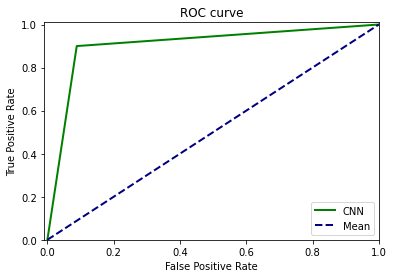

In [101]:
# Plot the ROC curve
plt.figure(2)
plt.plot(fpr_keras, tpr_keras, color='green',
         lw=2, label='CNN')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve")
plt.legend(loc="best")
plt.show()

In [102]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [103]:
auc_keras

0.9056662980246181